Apriori algorithm is used for determining frequent itemsets according to minimum support value and setting 
relationship rules of these items that provide the confidence value. 

By using crime dataset which includes several different types of crime that are based on real data, the 
relations between attributes of criminal cases are exposed by association rules. Apriori algorithm is used for creating association rules. The purpose of this study is to predict the unknown characteristics of a specific case such as offender profile, crime weapon, victim profile and geographical zone by taking into consideration the known characteristics of past criminal cases. 

The proposed study consists of five steps mainly as follows: data pre-processing, data encoding, creating 
transactions in the dataset, creating frequent itemsets which provide minimum support value and creating association rules which provide minimum confidence value out of the created itemsets.

# Importing libraries

In [1]:
import numpy as np #numpy linear algebra
import pandas as pd #data processing, CSV File I/O (pd.read_csv)
import matplotlib.pyplot as plt #data visualization
import seaborn as sns #statistical data visualization
import mlxtend
from mlxtend.preprocessing import TransactionEncoder
np.random.seed(42)

# list all files in ../Data/
import os
for dirname, _, filenames in os.walk('Data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Data/2022.csv
Data/Crime_Data_from_2020_to_Present.csv


In [2]:
#ignore non-critical warnings
import warnings
warnings.filterwarnings('ignore')


# Loading Data

In [3]:
data = 'Data/Crime_Data_from_2020_to_Present.csv'

df = pd.read_csv(data)

# Data Cleaning and Exploration

In [4]:
df.shape #check shape of dataset

(807377, 28)

In [5]:
df.head() #check the first 5 rows

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [6]:
df.info() #view dataset summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807377 entries, 0 to 807376
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           807377 non-null  int64  
 1   Date Rptd       807377 non-null  object 
 2   DATE OCC        807377 non-null  object 
 3   TIME OCC        807377 non-null  int64  
 4   AREA            807377 non-null  int64  
 5   AREA NAME       807377 non-null  object 
 6   Rpt Dist No     807377 non-null  int64  
 7   Part 1-2        807377 non-null  int64  
 8   Crm Cd          807377 non-null  int64  
 9   Crm Cd Desc     807377 non-null  object 
 10  Mocodes         696010 non-null  object 
 11  Vict Age        807377 non-null  int64  
 12  Vict Sex        701468 non-null  object 
 13  Vict Descent    701460 non-null  object 
 14  Premis Cd       807368 non-null  float64
 15  Premis Desc     806901 non-null  object 
 16  Weapon Used Cd  281174 non-null  float64
 17  Weapon Des

In [7]:
df.isnull().sum() #check for missing values in dataset

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           111367
Vict Age               0
Vict Sex          105909
Vict Descent      105917
Premis Cd              9
Premis Desc          476
Weapon Used Cd    526203
Weapon Desc       526203
Status                 0
Status Desc            0
Crm Cd 1              10
Crm Cd 2          747894
Crm Cd 3          805390
Crm Cd 4          807319
LOCATION               0
Cross Street      678145
LAT                    0
LON                    0
dtype: int64

In [8]:
rename = {'DR_NO' : 'DivisionRecordID',
         'Date Rptd' : 'DateReported',
         'DATE OCC':'DateOccured',
         'TIME OCC':'TimeOccured',
         'AREA':'AreaCode',
         'AREA NAME':'AreaName',
         'Rpt Dist No':'ReportingDistrictNo',
         'Part 1-2':'OffencePart',
         'Crm Cd':'CrimeCode',
         'Crm Cd Desc':'CrimeDesc',
         'Mocodes':'MOCodes',
         'Vict Age':'VictimAge',
         'Vict Sex':'VictimSex',
         'Vict Descent':'VictimDescent',
         'Premis Cd':'PremiseCode',
         'Premis Desc':'PremiseDesc',
         'Weapon Used Cd':'WeaponCode',
         'Weapon Desc':'WeaponDesc',
         'Status Desc':'StatusDesc',
         'Crm Cd 1':'CrimeCode1',
         'Crm Cd 2':'CrimeCode2',
         'Crm Cd 3':'CrimeCode3',
         'Crm Cd 4':'CrimeCode4',
         'LOCATION':'Location',
         'Cross Street':'CrossStreet',
         'LAT':'Latitude',
         'LON':'Longitude',}
df.rename(index = str, columns = rename, inplace = True) #rename columns to a same principle

In [9]:
vict_des_mapping = {'A':'Other Asian',
                  'B':'Black',
                  'C':'Chinese',
                  'D':'Cambodian',
                  'F':'Filipino',
                  'G':'Guamanian',
                  'H':'Hispanic/Latin/Mexican',
                  'I':'American Indian/Alaskan Native',
                  'J':'Japanese',
                  'K':'Korean',
                  'L':'Laotian',
                  'O':'Other',
                  'P':'Pacific Islander',
                  'S':'Samoan',
                  'U':'Hawaiian',
                  'V':'Vietnamese',
                  'W':'White',
                  'X':'Unknown',
                  'Z':'Asian Indian'}
df['VictimDescent'] = df['VictimDescent'].replace(vict_des_mapping) #rename columns to a same principle

In [10]:
df['DateReported'] = pd.to_datetime(df['DateReported']).dt.date #drop time from date time
df['DateOccured'] = pd.to_datetime(df['DateOccured']).dt.date

In [11]:
df['DateReported'] = pd.to_datetime(df['DateReported']) #change type to datetime
df['DateOccured'] = pd.to_datetime(df['DateOccured'])

In [12]:
df['DayOfWeekOccuredID'] = df['DateOccured'].dt.dayofweek #add DayOfWeek Column
df['DayOfWeekOccured'] = df['DateOccured'].dt.strftime('%A') #DayOfWeek in string

In [13]:
df['DeltaOfReport'] = (df['DateReported'] - df['DateOccured']).dt.days #Calculate days in between
                                                                       #crime date and report date

In [14]:
df_copy = df.copy() # keep a copy of df

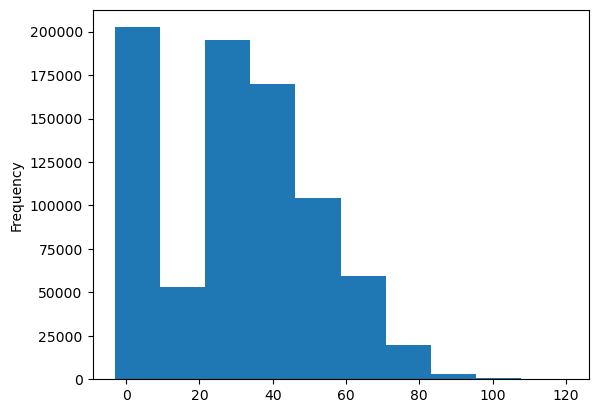

In [15]:
df_copy['VictimAge'].plot.hist()
df_copy = df_copy.loc[(df_copy['VictimAge']>0) &(df_copy['VictimAge']<100)] #keep only age > 0 & < 100

In [16]:
df_copy.select_dtypes(include=['object']).columns

Index(['AreaName', 'CrimeDesc', 'MOCodes', 'VictimSex', 'VictimDescent',
       'PremiseDesc', 'WeaponDesc', 'Status', 'StatusDesc', 'Location',
       'CrossStreet', 'DayOfWeekOccured'],
      dtype='object')

# Apriori Implementation

## Choosing attributes of the criminical cases

In [17]:
df_asso = df_copy[['AreaName','CrimeDesc','MOCodes','VictimSex','VictimDescent','PremiseDesc','WeaponDesc',
                   'DayOfWeekOccured','Location','CrossStreet']] 
df_asso.head(5)

,AreaName,CrimeDesc,MOCodes,VictimSex,VictimDescent,PremiseDesc,WeaponDesc,DayOfWeekOccured,Location,CrossStreet
0,Southwest,BATTERY - SIMPLE ASSAULT,0444 0913,F,Black,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Wednesday,1100 W 39TH PL,NaN
1,Central,BATTERY - SIMPLE ASSAULT,0416 1822 1414,M,Hispanic/Latin/Mexican,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,Wednesday,700 S HILL ST,NaN
3,N Hollywood,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,F,White,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,Wednesday,5400 CORTEEN PL,NaN
4,Mission,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,X,Unknown,BEAUTY SUPPLY STORE,NaN,Wednesday,14400 TITUS ST,NaN
5,Central,"RAPE, FORCIBLE",0413 1822 1262 1415,F,Hispanic/Latin/Mexican,NIGHT CLUB (OPEN EVENINGS ONLY),UNKNOWN WEAPON/OTHER WEAPON,Wednesday,700 S BROADWAY,NaN


## Check the total values for all attributes

M                                                 306906
F                                                 294317
Hispanic/Latin/Mexican                            243621
White                                             153097
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    143169
SINGLE FAMILY DWELLING                            134352
Black                                             113865
STREET                                            112335
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)       94633
Friday                                             91656
Saturday                                           89784
Monday                                             86318
Wednesday                                          86091
Sunday                                             85999
Thursday                                           85562
Tuesday                                            83231
BATTERY - SIMPLE ASSAULT                           63399
Other                          

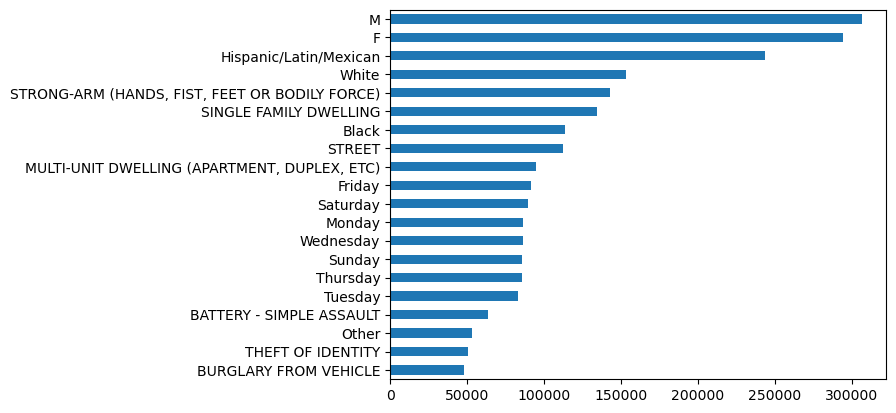

In [18]:
value_counts = df_asso.stack().value_counts().sort_values(ascending=False) ##Stack and count the total number of each value
print(value_counts.head(20))
value_counts.head(20).plot.barh().invert_yaxis()

## Creating transactions

In [19]:
df_asso = [row.dropna().tolist() for _, row in df_asso.iterrows()] ## Convert dataframe into list
df_asso[:5]

[['Southwest',
  'BATTERY - SIMPLE ASSAULT',
  '0444 0913',
  'F',
  'Black',
  'SINGLE FAMILY DWELLING',
  'STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)',
  'Wednesday',
  '1100 W  39TH                         PL'],
 ['Central',
  'BATTERY - SIMPLE ASSAULT',
  '0416 1822 1414',
  'M',
  'Hispanic/Latin/Mexican',
  'SIDEWALK',
  'UNKNOWN WEAPON/OTHER WEAPON',
  'Wednesday',
  '700 S  HILL                         ST'],
 ['N Hollywood',
  'VANDALISM - MISDEAMEANOR ($399 OR UNDER)',
  '0329 1402',
  'F',
  'White',
  'MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)',
  'Wednesday',
  '5400    CORTEEN                      PL'],
 ['Mission',
  'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
  '0329',
  'X',
  'Unknown',
  'BEAUTY SUPPLY STORE',
  'Wednesday',
  '14400    TITUS                        ST'],
 ['Central',
  'RAPE, FORCIBLE',
  '0413 1822 1262 1415',
  'F',
  'Hispanic/Latin/Mexican',
  'NIGHT CLUB (OPEN EVENINGS ONLY)',
  'UNKNOWN WEAPON/OTHER WEAPON',
  'Wednesday',


## Encoding data

In [20]:
# Transform the list with one-hot encoding
from mlxtend.preprocessing import TransactionEncoder
a = TransactionEncoder()
a_data = a.fit(df_asso).transform(df_asso, sparse = True)
df_asso1 = pd.DataFrame.sparse.from_spmatrix(a_data,columns=a.columns_)
df_asso1.head(100)

,-,00 17TH,00 17TH AV,00 17TH PL,00 18TH AV,00 19TH AV,00 20TH AV,00 20TH PL,00 23RD AV,00 24TH AV,...,ZEPHYR AV,ZEUS DR,ZOMBAR,ZOMBAR AV,ZONAL,ZONAL AV,ZONAL ST,ZOO,ZOO DR,ZUNIGA LN
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Creating frequent sets

In [21]:
# Extracting the most frequest itemsets with min_support = 0.02
from mlxtend.frequent_patterns import apriori, association_rules
df_asso2 = apriori(df_asso1, min_support = 0.02, use_colnames = True, verbose = 1)
df_asso2['length'] = df_asso2['itemsets'].apply(lambda x: len(x))
pd.options.display.max_colwidth = 100
df_asso2[(df_asso2['length'] > 1)] ## only choose sets with more than 2 attributes

Processing 1448 combinations | Sampling itemset size 43


,support,itemsets,length
64,0.026017,"(0344, M)",2
65,0.031909,"(Black, 77th Street)",2
66,0.036734,"(F, 77th Street)",2
67,0.027290,"(Hispanic/Latin/Mexican, 77th Street)",2
68,0.026838,"(M, 77th Street)",2
...,...,...,...
311,0.020002,"(M, Wednesday, White)",3
312,0.022322,"(STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE), F, Hispanic/Latin/Mexican, BATTERY - SIMPLE ASS...",4
313,0.025069,"(M, STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE), Hispanic/Latin/Mexican, BATTERY - SIMPLE ASS...",4
314,0.025838,"(INTIMATE PARTNER - SIMPLE ASSAULT, STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE), F, Hispanic/...",4


## Analysing association rules

In [22]:
# df_ar = association_rules(df_asso2, metric = "confidence", min_threshold = 0.6)
# 
df_ar = association_rules(df_asso2, metric ="lift", min_threshold = 1.2)
df_ar = df_ar.sort_values(['confidence','lift'], ascending =[False,False])
pd.options.display.max_colwidth = 100
df_ar[(df_ar['consequents'].str.len()> 1) & (df_ar['antecedents'].str.len()> 0)].head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
262,"(INTIMATE PARTNER - SIMPLE ASSAULT, Hispanic/Latin/Mexican)","(STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE), F)",0.034971,0.139550,0.025838,0.738830,5.294367,0.020958,3.294598,0.840514
159,(INTIMATE PARTNER - SIMPLE ASSAULT),"(STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE), F)",0.066187,0.139550,0.047736,0.721229,5.168241,0.038499,3.086586,0.863674
261,"(INTIMATE PARTNER - SIMPLE ASSAULT, F)","(STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE), Hispanic/Latin/Mexican)",0.050204,0.120003,0.025838,0.514662,4.288725,0.019813,1.813161,0.807363
193,(INTIMATE PARTNER - SIMPLE ASSAULT),"(STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE), Hispanic/Latin/Mexican)",0.066187,0.120003,0.033111,0.500273,4.168823,0.025169,1.760955,0.814000
252,"(Hispanic/Latin/Mexican, BATTERY - SIMPLE ASSAULT)","(M, STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE))",0.052149,0.094488,0.025069,0.480718,5.087637,0.020142,1.743779,0.847649
117,(BATTERY - SIMPLE ASSAULT),"(M, STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE))",0.104165,0.094488,0.049440,0.474629,5.023190,0.039597,1.723567,0.894052
249,"(M, BATTERY - SIMPLE ASSAULT)","(STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE), Hispanic/Latin/Mexican)",0.054751,0.120003,0.025069,0.457868,3.815460,0.018499,1.623215,0.780650
113,(BATTERY - SIMPLE ASSAULT),"(STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE), Hispanic/Latin/Mexican)",0.104165,0.120003,0.047415,0.455196,3.793196,0.034915,1.615255,0.821993
239,"(F, BATTERY - SIMPLE ASSAULT)","(STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE), Hispanic/Latin/Mexican)",0.049044,0.120003,0.022322,0.455142,3.792745,0.016436,1.615095,0.774314
240,"(Hispanic/Latin/Mexican, BATTERY - SIMPLE ASSAULT)","(STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE), F)",0.052149,0.139550,0.022322,0.428040,3.067285,0.015044,1.504389,0.711060


In [23]:
## Confidence table excluding STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
df_ar[~df_ar["consequents"].str.contains("STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)", regex=False) & 
      ~df_ar["antecedents"].str.contains("STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)", regex=False) &
     (df_ar['consequents'].str.len()> 1)].sort_values("confidence", ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
139,(INTIMATE PARTNER - SIMPLE ASSAULT),"(F, Hispanic/Latin/Mexican)",0.066187,0.202530,0.027116,0.409691,2.022868,0.013711,1.350937,0.541492
96,"(ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT)","(M, Hispanic/Latin/Mexican)",0.073383,0.197479,0.027985,0.381359,1.931132,0.013494,1.297231,0.520354
91,(77th Street),"(Black, F)",0.064043,0.105077,0.020263,0.316401,3.011144,0.013534,1.309135,0.713601
178,(THEFT OF IDENTITY),"(F, SINGLE FAMILY DWELLING)",0.082842,0.127929,0.024505,0.295809,2.312288,0.013908,1.238401,0.618790
197,(STREET),"(M, Hispanic/Latin/Mexican)",0.184567,0.197479,0.051753,0.280402,1.419908,0.015305,1.115235,0.362665
107,(BATTERY - SIMPLE ASSAULT),"(M, Hispanic/Latin/Mexican)",0.104165,0.197479,0.027474,0.263758,1.335624,0.006904,1.090023,0.280505
145,"(MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC))","(F, Hispanic/Latin/Mexican)",0.155482,0.202530,0.038827,0.249723,1.233016,0.007338,1.062900,0.223773
149,(SINGLE FAMILY DWELLING),"(F, Hispanic/Latin/Mexican)",0.220741,0.202530,0.053843,0.243919,1.204360,0.009136,1.054742,0.217750
123,"(MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC))","(Black, F)",0.155482,0.105077,0.023967,0.154143,1.466955,0.007629,1.058008,0.376920
181,(SINGLE FAMILY DWELLING),"(F, White)",0.220741,0.112988,0.030259,0.137080,1.213230,0.005318,1.027920,0.225540
